___

<a href='https://sites.google.com/fat.uerj.br/livia'><img src="../../figures/capa2.png"/></a>
___

# Regressão Linear com Python

A Regressão Linear fornece um modelo que relaciona a magnitude de uma variável e de outra. Como em uma análise que nos mostra que X e Y são diretamente proporcionais, ou o contrário, em que X aumenta e Y diminui. A regressão quantifica a índole da relação entre duas ou mais variáveis, sendo a variável alvo (y) e as variáveis preditoras (X).

## Agora vamos para um exemplo que irá clarear sua visão:

Sua vizinha é uma corretora de imóveis e quer ajuda prevendo o preço de casas em diferentes regiões dos EUA. Seria ótimo se você de alguma forma pudesse criar um modelo a ela, permitindo-a inserir informações de uma casa e receber uma estimativa do quanto a casa seria vendida.

Ela perguntou se você a ajudaria com suas novas habilidades de data science. Você aceita e decide que a Regressão Linear seria um bom caminho para resolver este problema!

Sua vizinha então te fornece dados sobre casas em diferentes regiões dos Estados Unidos, que estão contidos no data set: USA_Housing.csv.

Os dados contêm as seguintes colunas: 

* 'Méd. Renda Cidade': Renda média dos cidadãos de onde a casa está localizada. 
* 'Méd. Idade das Casas da Cidade': Idade média de casas na respectiva cidade.
* 'Méd. Número de Cômodos na Cidade': Quantidade média de cômodos das casas na mesma cidade.
* 'Méd. Número de Quartos na Cidade': Quantidade média de quartos das casas desta cidade. 
* 'População da Cidade': População da cidade de onde a casa está.
* 'Preço': Preço que a casa foi vendida
* 'Endereço': Endereço da casa

**Bora começar!**
## Conferir os dados
Nossos dados sobre as casas estão contidos em um arquivo csv, para chamá-los precisaremos primeiro importar as bibliotecas necessárias! 
### Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
data_path = '../../data/'

### Conferir os dados

In [2]:
USAhousing = pd.read_csv(data_path + 'USA_Housing.csv')

In [3]:
USAhousing.head() #é possível enxergar o topo do data set 

,Med. Renda Cidade,Med. Idade das Casas da Cidade,Med. Numero de Comodos na Cidade,Med. Numero de Quartos na Cidade,Populacao da Cidade,Preco,Endereco
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
USAhousing.info() #conseguimos maiores detalhes sobre as variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Med. Renda Cidade                 5000 non-null   float64
 1   Med. Idade das Casas da Cidade    5000 non-null   float64
 2   Med. Numero de Comodos na Cidade  5000 non-null   float64
 3   Med. Numero de Quartos na Cidade  5000 non-null   float64
 4   Populacao da Cidade               5000 non-null   float64
 5   Preco                             5000 non-null   float64
 6   Endereco                          5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Temos 6 variáveis numéricas (float64) e 1 como texto (object).**

In [5]:
USAhousing.describe() 
# número de dados por coluna, média, desvio padrão, valor mínimo e máximo
# 25, 50 e 75% são as porcentagens de valores iguais ou abaixo destes 

,Med. Renda Cidade,Med. Idade das Casas da Cidade,Med. Numero de Comodos na Cidade,Med. Numero de Quartos na Cidade,Populacao da Cidade,Preco
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
USAhousing.columns #nome de cada coluna

Index(['Med. Renda Cidade', 'Med. Idade das Casas da Cidade',
       'Med. Numero de Comodos na Cidade', 'Med. Numero de Quartos na Cidade',
       'Populacao da Cidade', 'Preco', 'Endereco'],
      dtype='object')

**Tendo em mãos nosso data set, a regressão será usada  para formar um modelo que preverá resultados individuais para um novo dado, isto é, um modelo preditivo.**

# Análise Exploratória de Dados (AED)

Criaremos plots na tentativa de encontrar relações importantes entre os dados, comportamentos anômalos e escolher um modelo.

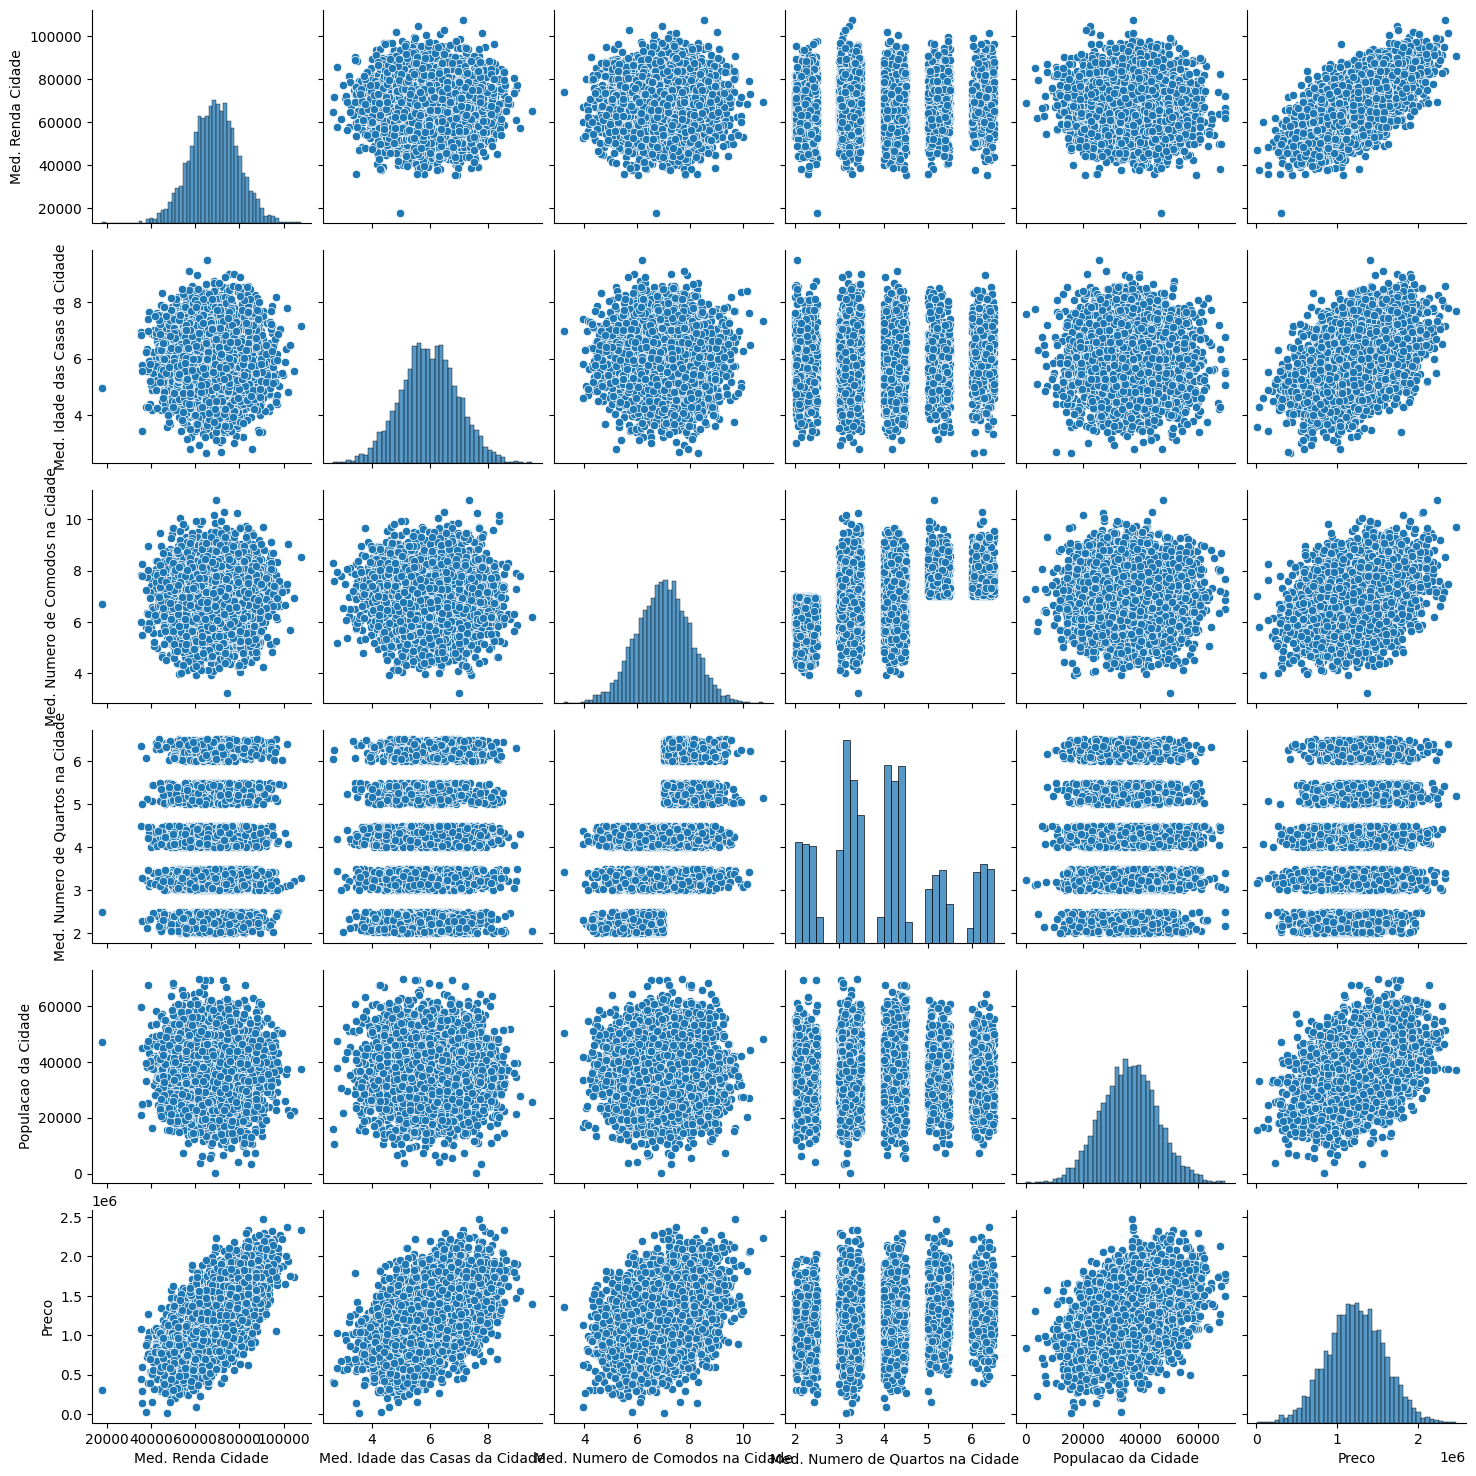

In [7]:
sns.pairplot(USAhousing);

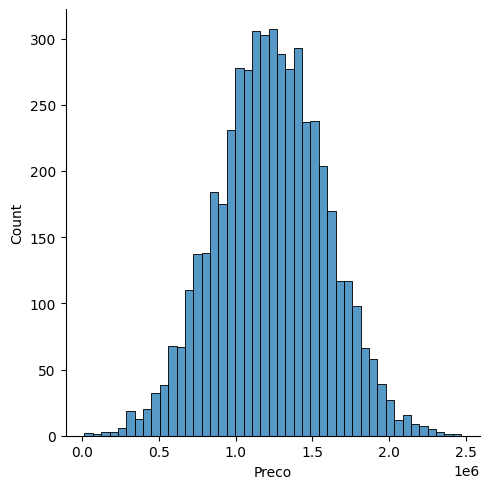

In [8]:
sns.displot(USAhousing['Preco']);

**Aqui podemos enxergar que preços entre 1 e 1.5 $\times 10^6$ comportam a maioria dos dados de preço.**

In [15]:
USAhousing.corr(numeric_only=True) #correlação entre as variáveis

,Med. Renda Cidade,Med. Idade das Casas da Cidade,Med. Numero de Comodos na Cidade,Med. Numero de Quartos na Cidade,Populacao da Cidade,Preco
Med. Renda Cidade,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Med. Idade das Casas da Cidade,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Med. Numero de Comodos na Cidade,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Med. Numero de Quartos na Cidade,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Populacao da Cidade,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Preco,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

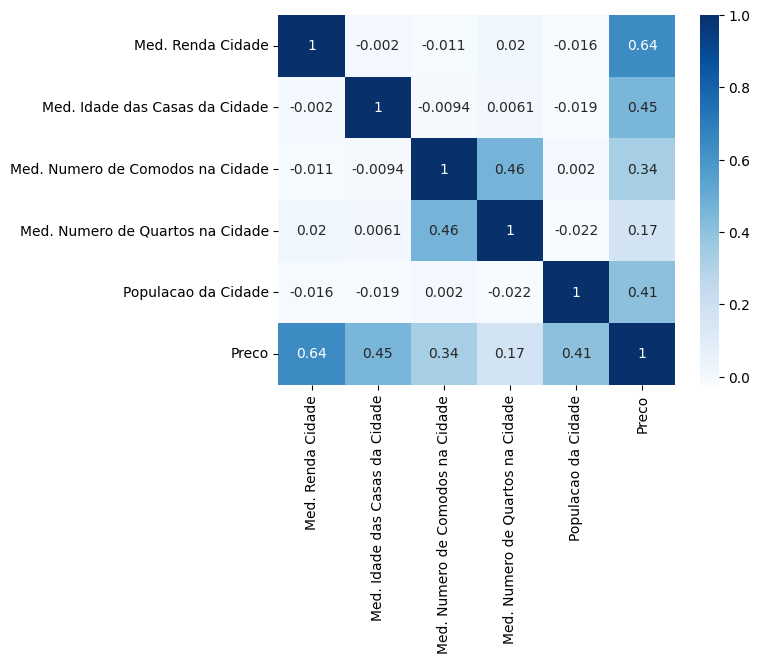

In [13]:
sns.heatmap(USAhousing.corr(numeric_only=True),cmap="Blues",annot=True)

**Podemos visualizar as correlações entre todos os dados, sendo 1 a correlação máxima e 0 a falta de correlação.**

## Treinando o Modelo de Regressão Linear

Vamos agora começar o treinamento do nosso modelo de regressão!

Pra começar precisaremos dividir nossos dados em:

- Uma lista X, armazenará os dados para o treinamento de previsão. 
- uma lista y, irá guardar a variável alvo, aquela que queremos prever, o preço.

Vamos descartar a coluna endereço, já que ela contém apenas informação em formato texto.
### Listas X e y

**Incluiremos as variáveis preditoras e as de resultado, sendo elas, respectivamente, X e y.**

**Mas quem serão elas? Como a vizinha quer "prever" o Preço, essa será nossa variável a ser prevista e as variáveis restantes serão nossas preditoras, ou seja, ajudarão na previsão.**

In [14]:
X = USAhousing[['Med. Renda Cidade', 'Med. Idade das Casas da Cidade',
       'Med. Numero de Comodos na Cidade', 'Med. Numero de Quartos na Cidade',
       'Populacao da Cidade']] 
y = USAhousing['Preco']

## Dividindo os dados em conjuntos, de treino e teste

Agora iremos dividir os dados em um conjunto de treinamento e um conjunto de teste, ambos contendo X e y. 

- O conjunto de treino (_train) será usado apenas para ensinar o algorítmo.

- O conjunto de teste (_test) é usado para testar o modelo após seu desenvolvimento. 


Vamos então chamar a função train_test_slip, que irá treinar o modelo usando o conjunto de treino e usar o conjunto de teste para avaliar o modelo.

Scikit-Learn é uma biblioteca de aprendizado de máquina para Python. Ele possui várias ferramentas para modelagem de dados, incluindo processos de pré-processamento de dados.

In [16]:
from sklearn.model_selection import train_test_split

**Essa função espera dados/matrizes com a mesma quantidade de linhas.**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**Recebe X e y. Cada uma será dividida em duas, contendo os dados originais: 60%  treino(_train) e 40% teste(_test).**

In [18]:
len(X_test),len(X_test)==len(y_test)

(2000, True)

In [19]:
len(X_train),len(X_train)==len(y_train)

(3000, True)

## Criando e Treinando o Modelo

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train) 

LinearRegression()

**Treinando o conjunto de treino para depois aplicar no conjunto de teste.**

## Avaliação do Modelo

Vamos avaliar o modelo checando seus coeficientes e como os interpretamos.

In [24]:
lm.intercept_,lm.coef_

(-2640159.7968526953,
 array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
        1.51504200e+01]))

In [25]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Med. Renda Cidade,21.528276
Med. Idade das Casas da Cidade,164883.282027
Med. Numero de Comodos na Cidade,122368.678027
Med. Numero de Quartos na Cidade,2233.801864
Populacao da Cidade,15.150420


Interpretando os coeficientes:

- Fixando todas as outras variáveis, um aumento de 1 unidade em **Med. Renda Cidade** é equivalente a um **aumento de \$21.52**.
- Fixando todas as outras variáveis, um aumento de 1 unidade em **Med. Idade das Casas da Cidade** é equivalente a um **aumento de \$164883.28**.
- Fixando todas as outras variáveis, um aumento de 1 unidade em **Med. Numero de Comodos na Cidade** é equivalente a um **aumento de \$122368.67**.
- Fixando todas as outras variáveis, um aumento de 1 unidade em **Med. Numero de Quartos na Cidade** é equivalente a um **aumento de \$2233.80**.
- Fixando todas as outras variáveis, um aumento de 1 unidade em **Populacao da Cidade** é equivalente a um **aumento de \$15.15**.

Já que esses dados não são reais essa análise não faz muito sentido com a realidade. Dados do mesmo tipo que são reais podem ser encontrados em [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Previsões para o nosso modelo

Vamos ver como as previsões do conjunto de teste se sairam!

In [26]:
predictions = lm.predict(X_test)

**Executa previsões no X_test (40% dos dados X), retornando as previsões, baseadas no modelo de regressão linear.**

In [27]:
fig = go.Figure()
fig.update_xaxes(title_text='y_test')
fig.update_yaxes(title_text="Previsões")
fig.add_scatter(x=y_test,y=predictions,mode='markers')

**Notamos uma boa correspondência entre os dados de teste e de previsão.**

**Abaixo iremos visualizar isso novamente, mas agora para cada variável do nosso data set:**

In [28]:
from plotly.subplots import make_subplots

variaveis = ['Med. Renda Cidade', 'Med. Idade das Casas da Cidade',
       'Med. Numero de Comodos na Cidade', 'Med. Numero de Quartos na Cidade',
       'Populacao da Cidade']

fig = make_subplots(rows=3, cols=2,subplot_titles=variaveis)

fig.add_trace(go.Scatter(x=X_test["Med. Renda Cidade"], y=y_test, 
                         mode='markers',name='Teste'), row=1, col=1)

fig.add_trace(go.Scatter(x=X_test["Med. Renda Cidade"], y=predictions,
                         mode="markers",name='Previsão'),row=1, col=1)

############################
fig.add_trace(go.Scatter(x=X_test["Med. Idade das Casas da Cidade"], y=y_test, 
                         mode='markers',name='Teste'), row=1, col=2)

fig.add_trace(go.Scatter(x=X_test["Med. Idade das Casas da Cidade"], y=predictions,
                         mode="markers",name='Previsão'),row=1, col=2)

############################
fig.add_trace(go.Scatter(x=X_test["Med. Numero de Comodos na Cidade"], y=y_test, 
                         mode='markers',name='Teste'), row=2, col=1)

fig.add_trace(go.Scatter(x=X_test["Med. Numero de Comodos na Cidade"], y=predictions,
                         mode="markers",name='Previsão'),row=2, col=1)

############################
fig.add_trace(go.Scatter(x=X_test["Med. Numero de Quartos na Cidade"], y=y_test, 
                         mode='markers',name='Teste'), row=2, col=2)

fig.add_trace(go.Scatter(x=X_test["Med. Numero de Quartos na Cidade"], y=predictions,
                         mode="markers",name='Previsão'),row=2, col=2)

############################
fig.add_trace(go.Scatter(x=X_test["Populacao da Cidade"], y=y_test, 
                         mode='markers',name='Teste'), row=3, col=1)

fig.add_trace(go.Scatter(x=X_test["Populacao da Cidade"], y=predictions,
                         mode="markers",name='Previsão'),row=3, col=1)

fig.show()

**Histograma Residual**

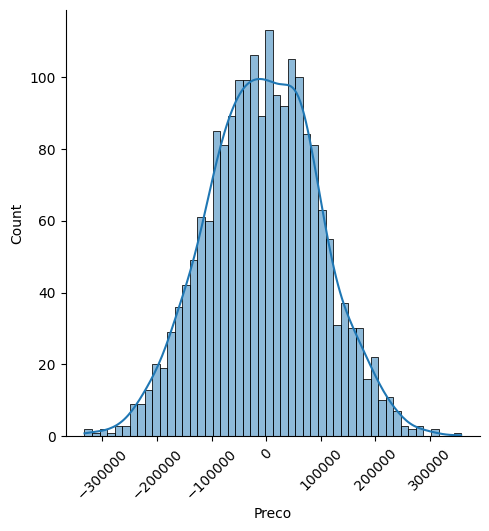

In [29]:
sns.displot((y_test-predictions),bins=50, kde=True);
plt.xticks(rotation=45);

**É usado para verificar se a variância é normalmente distribuída.**

**Um histograma simétrico em forma de sino, como este, que é distribuído uniformemente em torno de zero, indica que a suposição de normalidade provavelmente é verdadeira.**

## Medidas de Avaliação de uma Regressão


Temos três modos comuns de se avaliar problemas de regressão:

**Erro Médio Absoluto** (MAE) é a média do valor do erro absoluto:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Erro Quadrático Médio** (MSE) é a média dos erros ao quadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz Quadrada do Erro Médio** (RMSE) é a raíz quadrada da média entre os erros ao quadrada:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando essas avaliações de erro:

- **MAE** é o mais fácil de entender, já que é o erro médio.
- **MSE** é mais usado que o MAE, devido a maior punição por erros maiores e ser mais útil no mundo real.
- **RMSE** é mais popular ainda,por ser interpretável em unidades de "y".

Tudo isso apresentado são **funções loss**, porque queremos minimizá-las.

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897


Isso foi nosso primeiro projeto real de Machine Learning! Parabéns por ajudar sua vizinha! Iremos terminar por agora, mas continue explorando o Dataset de Boston mensionado lá em cima, se esse data set o interessou!

Em seguida será seu próprio projeto de Machine Learning!

## Bom Trabalho!